### Evaluation Project - 8
# Rainfall Prediction - Weather Forecasting
### Problem Statement:

## Rain Prediction –Weather forecasting

**Weather forecasting** is the application of science and technology to predict the **conditions of the atmosphere** for a given **location** and **time**. **Weather forecasts** are made by collecting **quantitative data** about the **current state of the atmosphere** at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. **Here, predict two things:**
 
### 1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast **whether or not it will rain tomorrow.**

b)  Design a predictive model with the use of machine learning algorithms to **predict how much rainfall could be there.**

Dataset Description:

Number of columns: **23**

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset available below



### Downlaod Files:

https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv 

https://github.com/dsrscientist/dataset3 

## Importing required liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Importing data as CSV file and coverting it to DataFrame.

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(8425, 23)

**There are 8425 rows and 23 columns in our dataset.**

### Checking some additional information of our data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print('___')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
___
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
___
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
___
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
___
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1

### Observation
1. We have data with Rainfall Prediction using various other features.
2. We have to predict Rainfall and Prediction whether it will rain Tomorrow or not.
3. We will build 2 model one of classifier and other of regressor.
4. Out data currently have 8423 rows and 23 columns.
5. There are some null values which needs to be filled, we will be using imputation technique to fill these values.
6. Also, categorical data will need to be changed to numeric using encoding Label Encoder.
7. We will separate Date column to Day, Month and Year and remove Date from our dataset.

In [7]:
# Checking columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### Coverting date in Day,Month and Year columns

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#Extracting Day
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

#Extracting Month 
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

#Extracting Year 
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

In [10]:
# Dropping Date column from our data
df.drop(columns=['Date'],axis=1,inplace=True)

In [11]:
# Checking column names
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

# Filling Null values using Imputations

### Categorical columns via MODE

In [12]:
# Filling values via mode as these are short and catergorical data
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace = True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace = True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace = True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace = True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace = True)

In [13]:
data = df.copy()

# Encoding Above 5 columns using Label Encoder

In [14]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [15]:
# Encoding categorical data
LE = LabelEncoder()
columns =['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for i in columns:
    df[i] = LE.fit_transform(df[i])

# Iterative Imputer for float columns

In [16]:
# Importing IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [17]:
# Imputing remaining columns using IterativeImputer
df_new = IterativeImputer()
df_new = pd.DataFrame(df_new.fit_transform(df[['Day', 'Month', 'Year', 'MinTemp', 'MaxTemp', 'Rainfall', 
                                               'Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']]), 
        columns=['Day', 'Month', 'Year', 'MinTemp', 'MaxTemp', 'Rainfall', 
                                               'Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm'])
df_new

,Day,Month,Year,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,1.0,12.0,2008.0,13.4,22.900000,0.6,3.194193,7.017613,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.123513,16.9,21.8
1,2.0,12.0,2008.0,7.4,25.100000,0.0,3.782574,12.799771,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,1.099226,1.619932,17.2,24.3
2,3.0,12.0,2008.0,12.9,25.700000,0.0,5.728303,12.205468,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,2.220047,2.000000,21.0,23.2
3,4.0,12.0,2008.0,9.2,28.000000,0.0,3.558423,13.319713,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,0.506143,1.025754,18.1,26.5
4,5.0,12.0,2008.0,17.5,32.300000,1.0,3.765248,6.979772,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21.0,6.0,2017.0,2.8,23.400000,0.0,6.957544,11.418350,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,0.853871,1.727655,10.1,22.4
8421,22.0,6.0,2017.0,3.6,25.300000,0.0,6.663456,12.104654,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,0.729596,1.292887,10.9,24.5
8422,23.0,6.0,2017.0,5.4,26.900000,0.0,8.423890,11.881216,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,1.003774,1.735513,12.5,26.1
8423,24.0,6.0,2017.0,7.8,27.000000,0.0,8.745717,10.868035,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [18]:
# Assigning Location to A to further add it to main dataframe
A = pd.DataFrame(df[['Location']])

In [19]:
# Encoding categorical data
LE = LabelEncoder()
columns =['Location']
for i in columns:
    A[i] = LE.fit_transform(A[i])

In [20]:
# Adding A Location to main dataframe
df_new['Location']= A['Location']

In [21]:
# Adding categorical data to dataframe
df_new[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]= df[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]

In [22]:
df_new

,Day,Month,Year,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,1.0,12.0,2008.0,13.4,22.900000,0.6,3.194193,7.017613,44.000000,20.0,...,8.000000,5.123513,16.9,21.8,1,13,13,14,0,0
1,2.0,12.0,2008.0,7.4,25.100000,0.0,3.782574,12.799771,44.000000,4.0,...,1.099226,1.619932,17.2,24.3,1,14,6,15,0,0
2,3.0,12.0,2008.0,12.9,25.700000,0.0,5.728303,12.205468,46.000000,19.0,...,2.220047,2.000000,21.0,23.2,1,15,13,15,0,0
3,4.0,12.0,2008.0,9.2,28.000000,0.0,3.558423,13.319713,24.000000,11.0,...,0.506143,1.025754,18.1,26.5,1,4,9,0,0,0
4,5.0,12.0,2008.0,17.5,32.300000,1.0,3.765248,6.979772,41.000000,7.0,...,7.000000,8.000000,17.8,29.7,1,13,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21.0,6.0,2017.0,2.8,23.400000,0.0,6.957544,11.418350,31.000000,13.0,...,0.853871,1.727655,10.1,22.4,9,0,9,1,0,0
8421,22.0,6.0,2017.0,3.6,25.300000,0.0,6.663456,12.104654,22.000000,13.0,...,0.729596,1.292887,10.9,24.5,9,6,9,3,0,0
8422,23.0,6.0,2017.0,5.4,26.900000,0.0,8.423890,11.881216,37.000000,9.0,...,1.003774,1.735513,12.5,26.1,9,3,9,14,0,0
8423,24.0,6.0,2017.0,7.8,27.000000,0.0,8.745717,10.868035,28.000000,13.0,...,3.000000,2.000000,15.1,26.0,9,9,10,3,0,0


### Checking Null Values

In [23]:
# After imputing and ecnoding all columsn checking if our data has any null values
df_new.isnull().sum()

Day              0
Month            0
Year             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

Day              0
Month            0
Year             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64


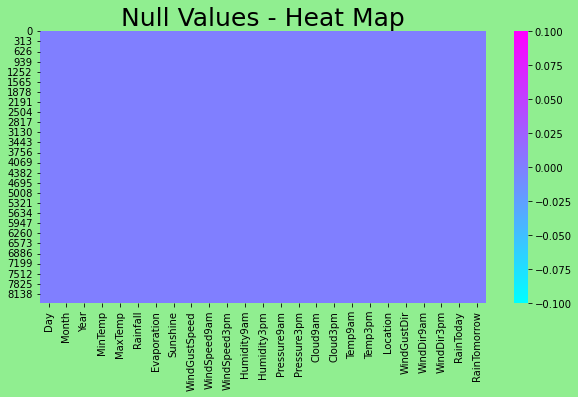

In [24]:
# Visualizing null data
null = df_new.isnull().sum()
print(null)
plt.figure(figsize=[10,5], facecolor = 'lightgreen')
sns.heatmap(df_new.isnull(), cmap = 'cool')
plt.title(("Null Values - Heat Map"), fontsize = 25)
plt.show()

### Observation

1.	Finally, after all correlation, imputation, labelling we have 25 columns and 8425 rows in our dataset and no null values.
2.	WindGustDir, WindDir9am, WindDir3pm, RainToday and Rain Tomorrow These are categorical columns for which I have used mode value and for other columns I have used imputation technique (Iterative Imputer)
3.	After that we have assigned our original data to new dataframe for further work
4.	Now lest explore more from our data using EDA
5.	Also we will see some graphs for visualization.

# EDA - Exploratory Data Analysis

### Data Visualization

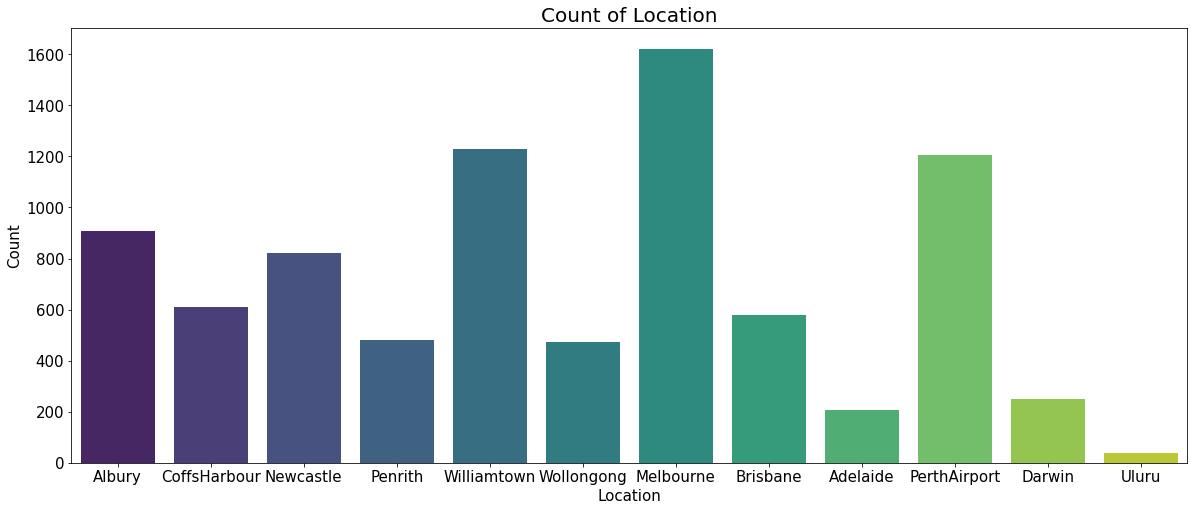

In [25]:
# Visualizing Location
plt.figure(figsize=(20,8))
plt.title('Count of Location', fontsize = 20)
sns.countplot(data['Location'],palette='viridis')
plt.xlabel('Location',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

**Observation - Melbourne has highest count, followed by PerthAirport while Adelaide have least count.**

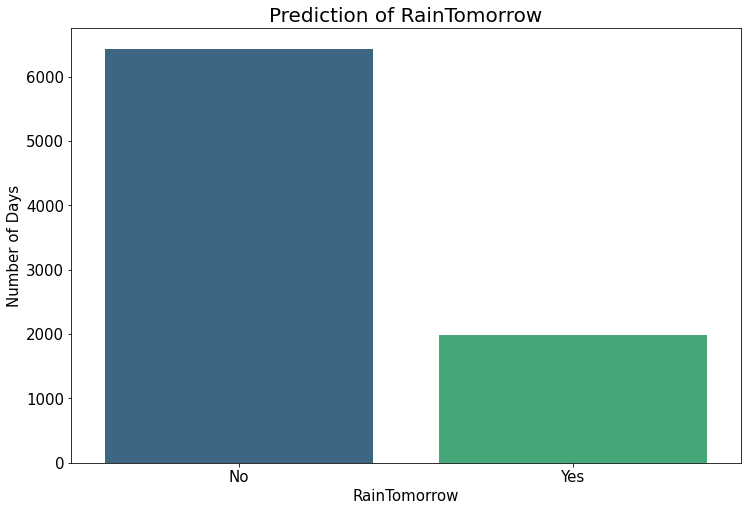

In [26]:
#Visualing RainfallTomorrow:
plt.figure(figsize=(12,8))
plt.title('Prediction of RainTomorrow', fontsize = 20)
sns.countplot(data['RainTomorrow'],palette='viridis')
plt.xlabel('RainTomorrow',fontsize=15)
plt.ylabel('Number of Days',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

**Observation - Mostly there is no rain in our data**

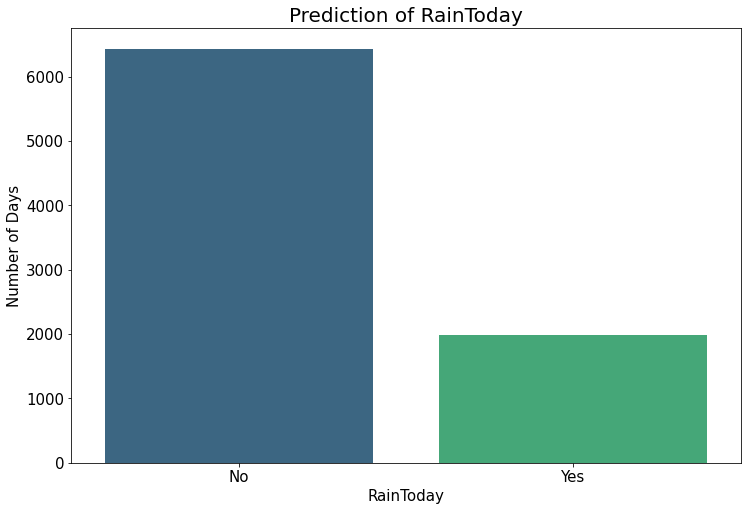

In [27]:
# Visuvalization of RainFall Today

plt.figure(figsize=(12,8))
plt.title('Prediction of RainToday', fontsize = 20)
sns.countplot(data['RainToday'],palette='viridis')
plt.xlabel('RainToday',fontsize=15)
plt.ylabel('Number of Days',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

**Observation - It has almost same data as RainTomorrow**

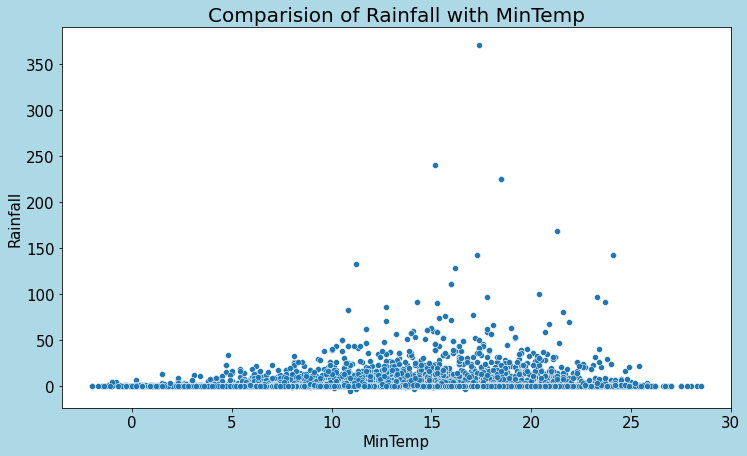

In [28]:
# Comparision of Rainfall with low temprature
plt.figure(figsize=(12,7),facecolor = 'lightblue')
sns.scatterplot( y = 'Rainfall',x = 'MinTemp',data = df_new, palette = 'winter')
plt.title('Comparision of Rainfall with MinTemp',fontsize=20)
plt.ylabel('Rainfall',fontsize=15)
plt.xlabel('MinTemp',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

**Observation - Majority of rainball is between 10-20 temperate, while where there is less temprate rainfall is less.**

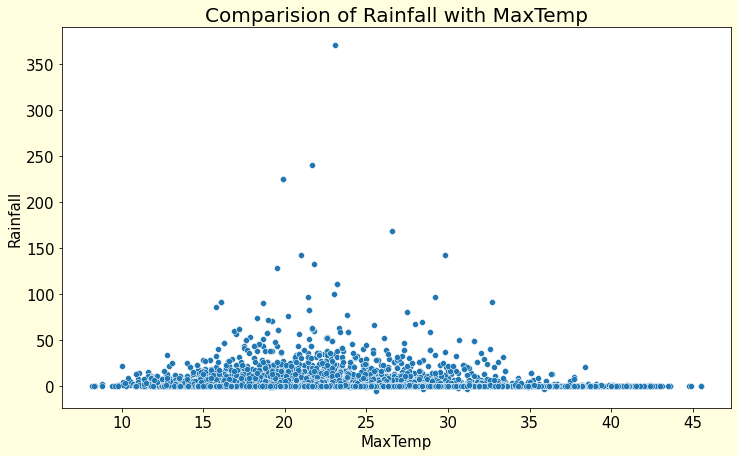

In [29]:
# Comparision of Rainfall with MAX temprature
plt.figure(figsize=(12,7),facecolor = 'lightyellow')
sns.scatterplot( y = 'Rainfall',x = 'MaxTemp',data = df_new)
plt.title('Comparision of Rainfall with MaxTemp',fontsize=20)
plt.ylabel('Rainfall',fontsize=15)
plt.xlabel('MaxTemp',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

**Observation - From above graph we can see that where tempreate gets increaing rainfall gets reducing, mostly the rainfall happens between 15-25 degree of temprature** 

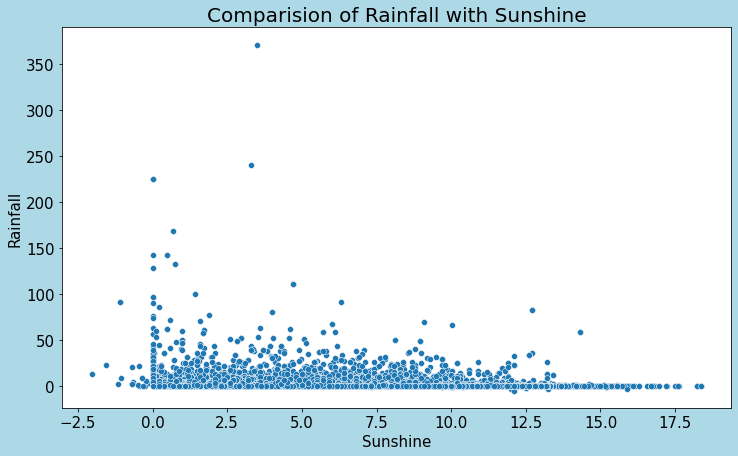

In [30]:
# Comparision of Rainfall with MAX temprature
plt.figure(figsize=(12,7),facecolor = 'lightblue')
sns.scatterplot( y = 'Rainfall',x = 'Sunshine',data = df_new)
plt.title('Comparision of Rainfall with Sunshine',fontsize=20)
plt.ylabel('Rainfall',fontsize=15)
plt.xlabel('Sunshine',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

**Observation - There is constatant rainfall where sunshine is between 0-10, however once it gets beyond 10 rainfall decreases. So it have moderate relation with rainfall.**

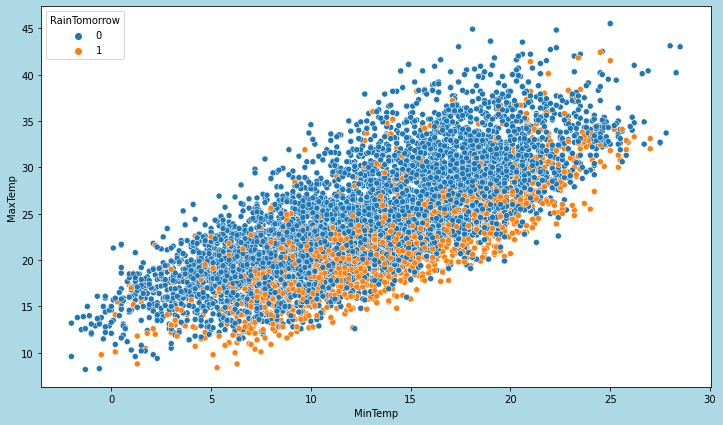

In [32]:
plt.figure(figsize=(12,7),facecolor = 'lightblue')
sns.scatterplot(df['MinTemp'],df['MaxTemp'],hue='RainTomorrow',data=df)
plt.show()

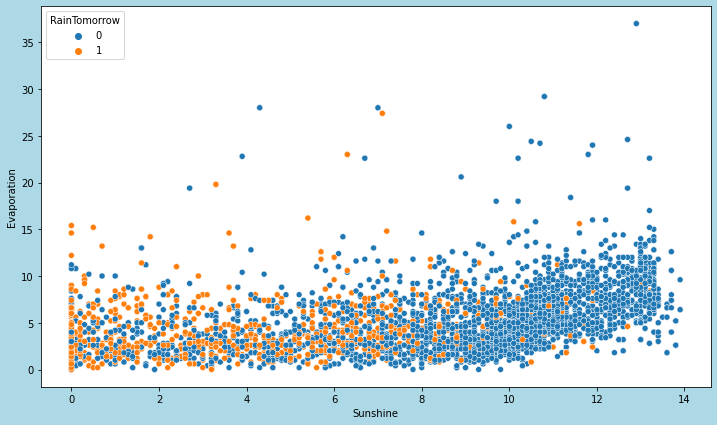

In [33]:
plt.figure(figsize=(12,7),facecolor = 'lightblue')
sns.scatterplot(df['Sunshine'],df['Evaporation'],hue='RainTomorrow',data=df)
plt.show()

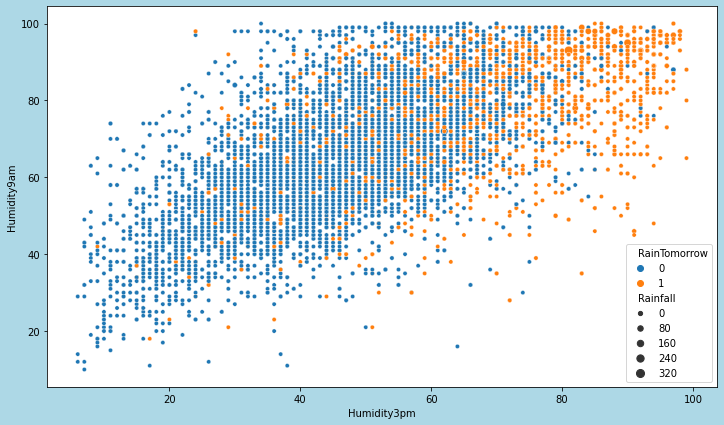

In [34]:
plt.figure(figsize=(12,7),facecolor = 'lightblue')
sns.scatterplot(df['Humidity3pm'],df['Humidity9am'],hue='RainTomorrow',size='Rainfall',data=df)
plt.show()

### Observation
- We have comprated min and max temprate with 'RainTomorrow' where minmum temprate is between 10-15 and max temprate is between 15-25 there are most chances of geeting rain.
- But where the tempratre gets above or below that chances of rainfall reduces.
- Chances of rainfall increase if Sushine is between 0-8, but if sunshine increase automatics chances of rainfall decreases.
- As per 3rd graph when humidity at 3 pm is between 80-100 and humidity at 9 pm is between 60-100 chances of rainfall increase, if humidity is less than 40 then there are very less changes of rain occuring.

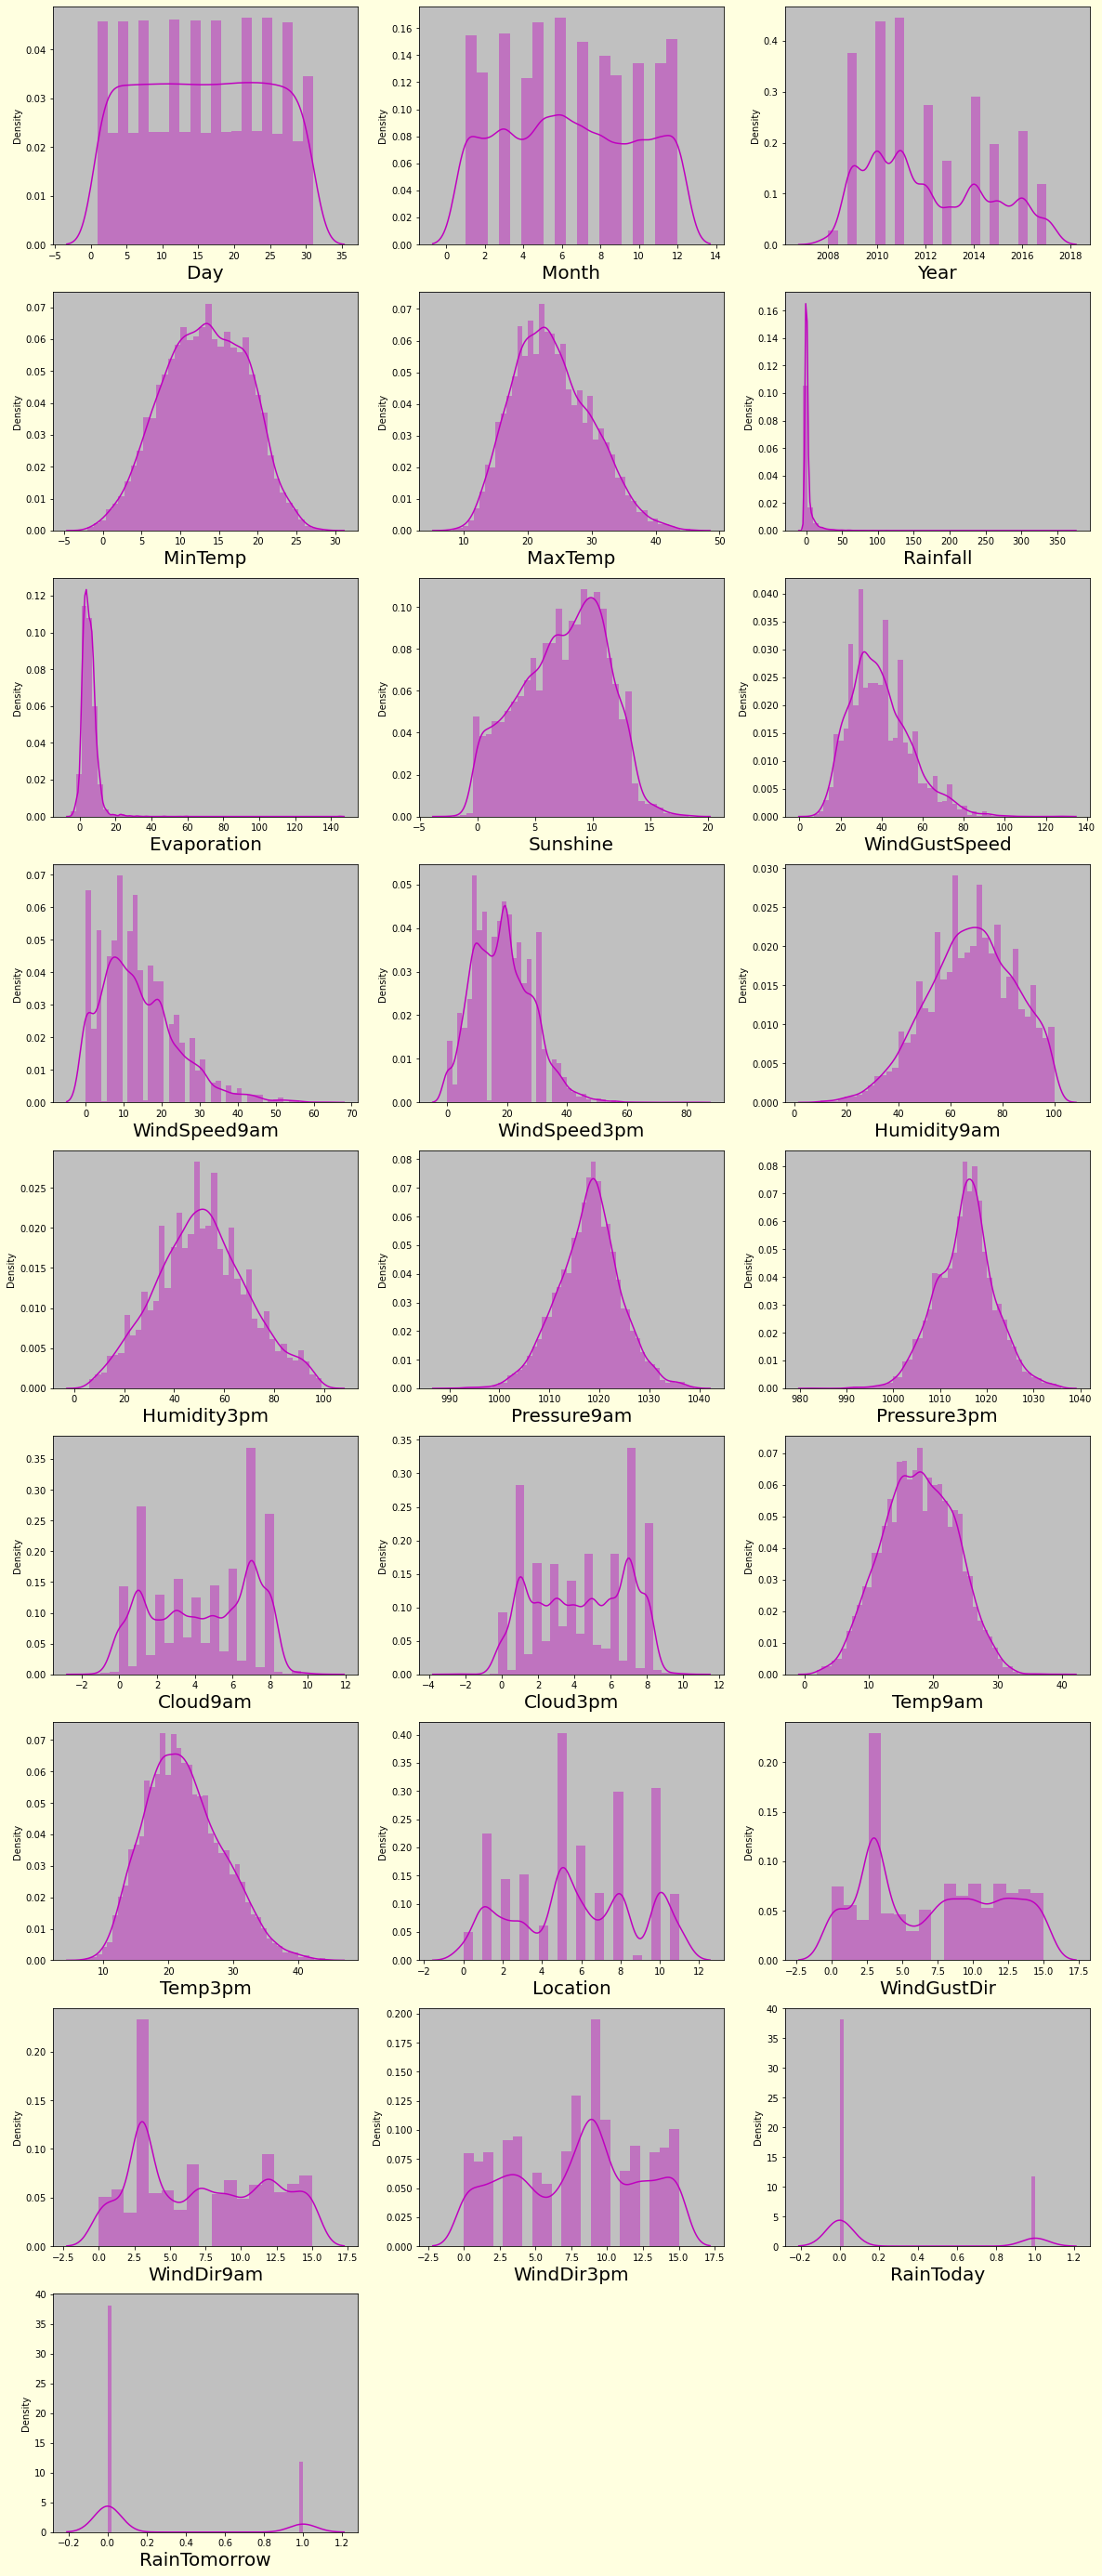

In [35]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN

plt.figure(figsize = (20,50), facecolor = 'lightyellow')
plotnumber = 1

for column in df_new:
    if plotnumber <= 25:
        ax = plt.subplot(9,3, plotnumber, facecolor = 'silver')
        sns.distplot (df_new[column], color = 'm')
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

Most of the columns pressure9am, pressure 3pm,humidity 3pm, temp9am, temp 3pm have normal distribution, while others dont, we will furthe check outliers

## Checking Outliers

### BoxPLOT

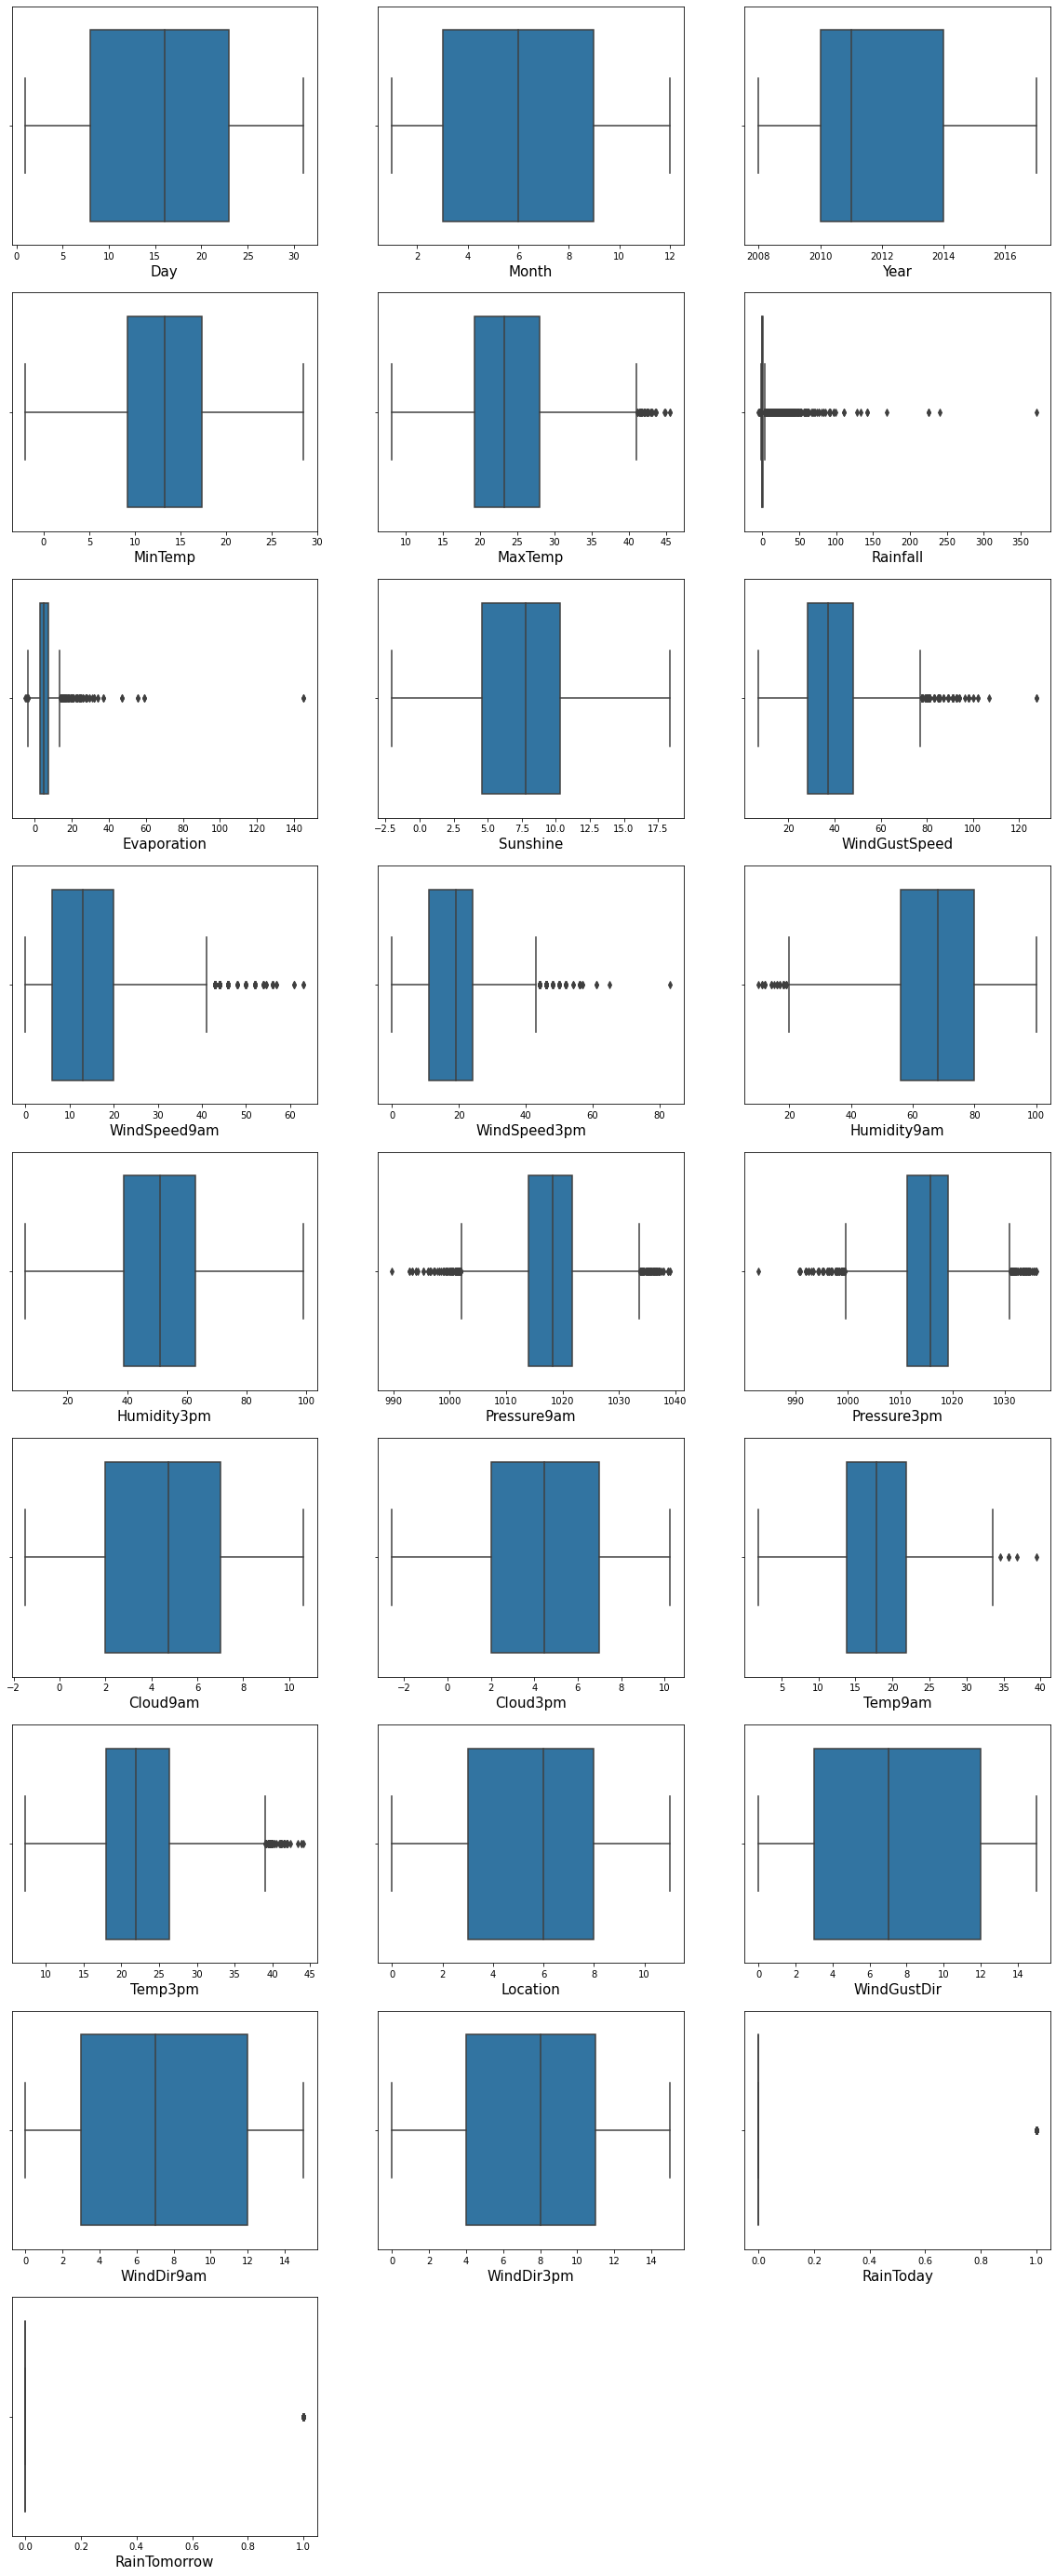

In [36]:
# Visualize the outliers using boxplot
plt.figure (figsize = (20,50))
graph = 1
for column in df_new:
    if graph <= 25:
        plt.subplot(9,3, graph)
        ax = sns.boxplot (df_new[column])
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show ()

## Removing Outliers

### Z - Score

In [37]:
# importing Z-Score from scipy stats
from scipy.stats import zscore

In [38]:
(np.abs(zscore(df_new)<3)).all()

Day               True
Month             True
Year              True
MinTemp           True
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine          True
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am       True
Humidity3pm       True
Pressure9am      False
Pressure3pm      False
Cloud9am          True
Cloud3pm          True
Temp9am          False
Temp3pm          False
Location          True
WindGustDir       True
WindDir9am        True
WindDir3pm        True
RainToday         True
RainTomorrow      True
dtype: bool

In [39]:
# Removing outliers
scores = np.abs(zscore(df_new))
t = 3
np.where(scores<3)

(array([   0,    0,    0, ..., 8424, 8424, 8424], dtype=int64),
 array([ 0,  1,  2, ..., 22, 23, 24], dtype=int64))

In [40]:
# Checking data shape before and after removing outliers

new_df1 = df_new[(scores<3).all(axis=1)]
print(df_new.shape)
print(new_df1.shape)

(8425, 25)
(8017, 25)


In [41]:
# Checking Data Loss percentage.
dataloss = (8425-8017)*100/8425
print ('DATA LOSS = ', dataloss, '%')

DATA LOSS =  4.84272997032641 %


## Correlation of Data

In [42]:
# Checking correlation using table
new_df1.corr()

,Day,Month,Year,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Day,1.000000,-0.003136,-0.004140,0.008108,0.014876,-0.016920,0.005217,0.002137,-0.012870,-0.010005,...,-0.006876,-0.004037,0.009517,0.015030,-0.004904,0.016755,-0.011084,-0.000431,-0.016790,-0.013447
Month,-0.003136,1.000000,-0.091761,-0.247897,-0.165817,0.012315,-0.028136,0.050470,0.049235,0.030988,...,-0.016115,0.000494,-0.166980,-0.181996,-0.085782,0.037731,0.019236,0.027506,0.004496,0.000474
Year,-0.004140,-0.091761,1.000000,0.042313,0.121939,0.015875,0.379429,0.010807,-0.089467,-0.092332,...,-0.003862,-0.012685,0.088957,0.133817,0.481965,-0.092814,-0.033080,-0.010554,-0.009500,-0.003126
MinTemp,0.008108,-0.247897,0.042313,1.000000,0.723912,0.099122,0.583908,0.071647,0.235041,0.143937,...,0.134894,0.072809,0.890464,0.692733,0.119199,-0.151348,-0.044212,-0.152767,0.061297,0.092463
MaxTemp,0.014876,-0.165817,0.121939,0.723912,1.000000,-0.138069,0.664626,0.565264,0.146903,0.012318,...,-0.322853,-0.324978,0.869158,0.979500,0.066512,-0.233463,-0.215452,-0.190157,-0.219058,-0.149637
Rainfall,-0.016920,0.012315,0.015875,0.099122,-0.138069,1.000000,-0.020017,-0.279047,0.092259,0.059653,...,0.272758,0.230203,-0.030248,-0.147130,0.029737,0.086207,0.122858,0.075738,0.675568,0.269774
Evaporation,0.005217,-0.028136,0.379429,0.583908,0.664626,-0.020017,1.000000,0.375783,0.339694,0.230129,...,-0.138970,-0.204277,0.664988,0.640323,0.288175,-0.121313,-0.032421,-0.066932,-0.127020,-0.072757
Sunshine,0.002137,0.050470,0.010807,0.071647,0.565264,-0.279047,0.375783,1.000000,0.023644,-0.044577,...,-0.766439,-0.792737,0.336557,0.589686,-0.069415,-0.106358,-0.099987,-0.068293,-0.341932,-0.419947
WindGustSpeed,-0.012870,0.049235,-0.089467,0.235041,0.146903,0.092259,0.339694,0.023644,1.000000,0.663821,...,0.050843,0.101461,0.209010,0.109562,0.233409,0.077099,-0.010359,0.063556,0.063283,0.163442
WindSpeed9am,-0.010005,0.030988,-0.092332,0.143937,0.012318,0.059653,0.230129,-0.044577,0.663821,1.000000,...,0.041582,0.096610,0.108383,-0.000993,0.237326,0.047907,0.081919,0.038613,0.045462,0.056493


### Checking correlation using heatmap

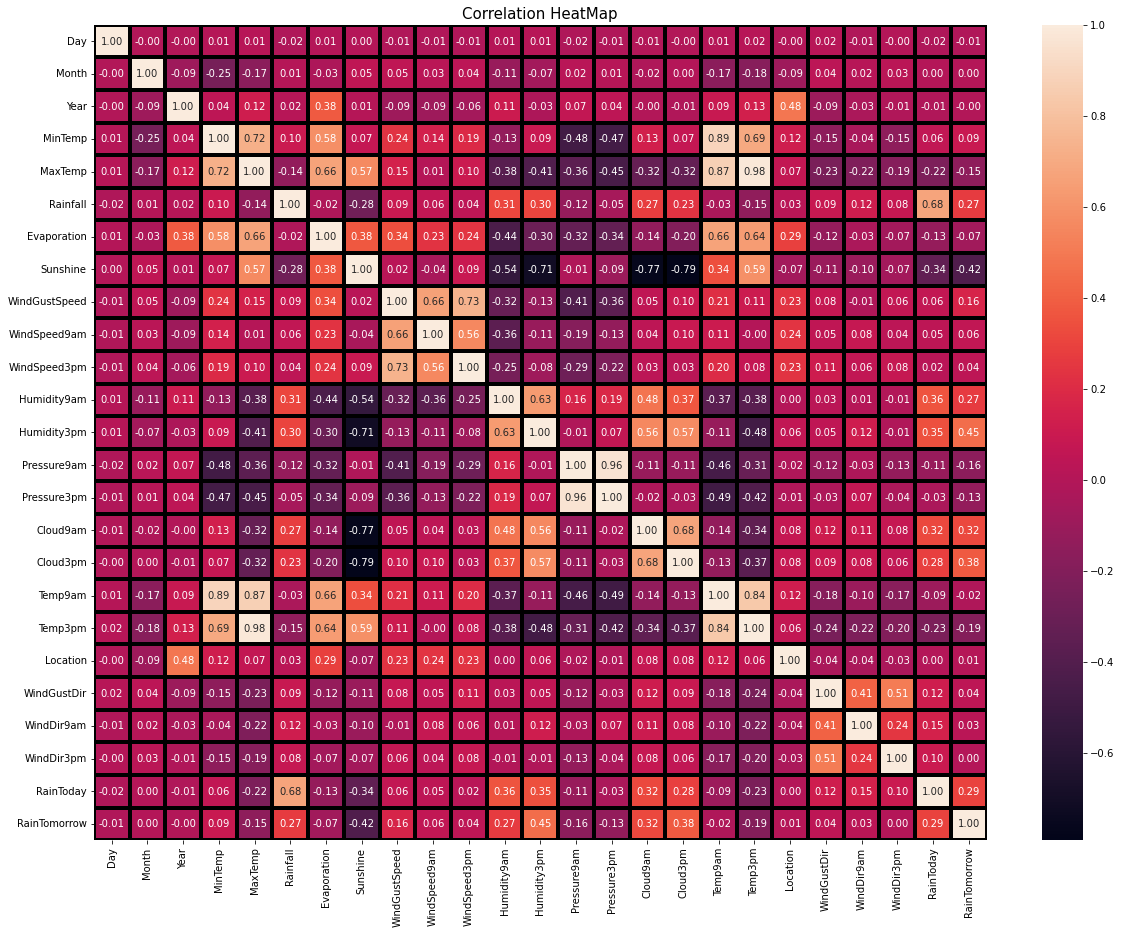

In [43]:
# Visulizing correlation using heatmap
plt.figure (figsize = (20,15))
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(new_df1.corr(), annot = True , linewidths = 4, linecolor='black',fmt='.2f')
plt.show()


### Correlation with target variable

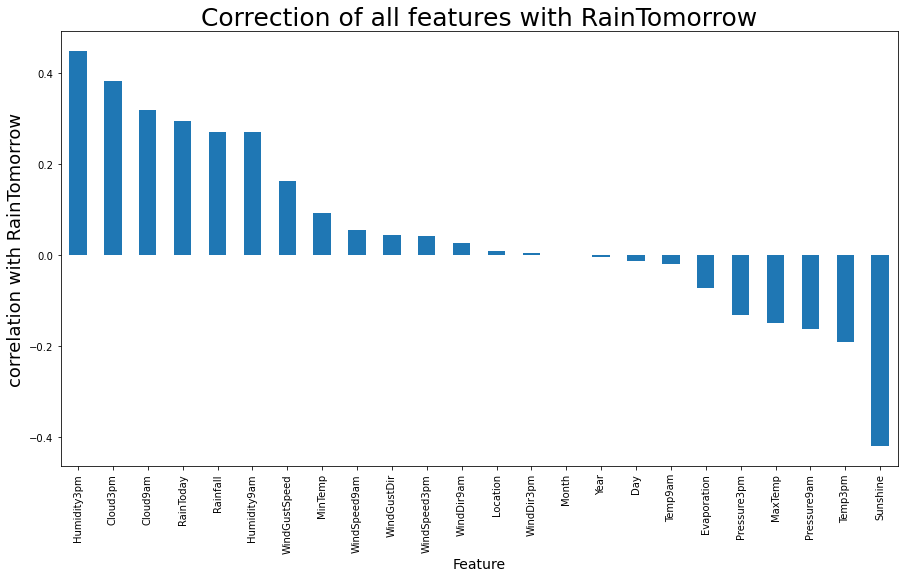

In [44]:
# Checking correlation of all features with RainTomorrow

plt.figure(figsize = (15,8))
new_df1.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot.bar()
plt.xlabel("Feature", fontsize = 14)
plt.ylabel("correlation with RainTomorrow", fontsize = 18)
plt.title ("Correction of all features with RainTomorrow", fontsize = 25)
plt.show()

### Observation
1. Humidity3Pm have most positive correlation with our target column, while Sunshie has most negative correlation with target column.
2. Cloud3pm, Cloud9am, RainToday, Rainfall, Humidity9am, WindGustSpeed, MinTemp, WindSpeed9am, WindGustDir, location have positive correlation with our target variable.
3. Location, WindDir3pm, Month, Year, Day have very less correlation with target column.

### Checking Skewness

In [45]:
# Checking skewness
new_df1.skew().sort_values()

Sunshine        -0.246336
Humidity9am     -0.232327
Cloud9am        -0.149333
WindDir3pm      -0.124699
MinTemp         -0.084192
Cloud3pm        -0.079160
Pressure9am     -0.057397
Location        -0.042546
Temp9am         -0.041134
Pressure3pm     -0.012973
Day              0.002824
Month            0.051875
WindGustDir      0.111987
Humidity3pm      0.129365
WindDir9am       0.163466
WindSpeed3pm     0.307970
MaxTemp          0.316861
Temp3pm          0.341653
Year             0.428024
Evaporation      0.450058
WindGustSpeed    0.547114
WindSpeed9am     0.709922
RainTomorrow     1.297633
RainToday        1.301865
Rainfall         3.384306
dtype: float64

### Removing Skewness

In [46]:
# Removing skewness
new_df1["Rainfall"] = np.cbrt(new_df1["Rainfall"])
new_df1["RainToday"] = np.cbrt(new_df1["RainToday"])
new_df1["RainTomorrow"] = np.cbrt(new_df1["RainTomorrow"])
new_df1["WindSpeed9am "] = np.cbrt(new_df1["WindSpeed9am"])

In [47]:
# checking after removing skewness
new_df1.skew().sort_values()

WindSpeed9am    -1.268399
Sunshine        -0.246336
Humidity9am     -0.232327
Cloud9am        -0.149333
WindDir3pm      -0.124699
MinTemp         -0.084192
Cloud3pm        -0.079160
Pressure9am     -0.057397
Location        -0.042546
Temp9am         -0.041134
Pressure3pm     -0.012973
Day              0.002824
Month            0.051875
WindGustDir      0.111987
Humidity3pm      0.129365
WindDir9am       0.163466
WindSpeed3pm     0.307970
MaxTemp          0.316861
Temp3pm          0.341653
Year             0.428024
Evaporation      0.450058
WindGustSpeed    0.547114
WindSpeed9am     0.709922
Rainfall         1.297144
RainTomorrow     1.297633
RainToday        1.301865
dtype: float64

**Making copy of new_df1 so it can be used for other prediction**

In [48]:
# Making 2 datafram one for classification and another for regressor model
new_df2 = new_df1.copy()

## Splitting Data to X and Y

In [49]:
x = new_df1.drop("RainTomorrow", axis=1)
y = new_df1["RainTomorrow"]

## StandardScaler for scaling Features

In [50]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Day,Month,Year,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,WindSpeed9am
0,-1.672365,1.632977,-1.662497,0.057333,-0.145108,0.373787,-0.562755,-0.111687,0.415595,0.713118,...,1.364812,0.314503,-0.137321,-0.095695,-1.508676,1.228375,1.251279,1.400759,-0.542317,0.707968
1,-1.558700,1.632977,-1.662497,-1.054000,0.219999,-0.645561,-0.375310,1.465778,0.415595,-0.984979,...,-1.237515,-1.084085,-0.083646,0.330524,-1.508676,1.440962,-0.276716,1.626999,-0.542317,-0.644752
2,-1.445035,1.632977,-1.662497,-0.035278,0.319574,-0.645561,0.244555,1.303642,0.561577,0.606987,...,-0.814846,-0.932367,0.596233,0.142987,-1.508676,1.653549,1.251279,1.626999,-0.542317,0.652737
3,-1.331370,1.632977,-1.662497,-0.720600,0.701276,-0.645561,-0.446720,1.607626,-1.044231,-0.242062,...,-1.461171,-1.321274,0.077378,0.705597,-1.508676,-0.684909,0.378139,-1.766604,-0.542317,0.119313
4,-1.217705,1.632977,-1.662497,0.816744,1.414894,0.563010,-0.380830,-0.122011,0.196621,-0.666586,...,0.987706,1.462762,0.023703,1.251157,-1.508676,1.228375,-1.368141,-0.182922,-0.542317,-0.254029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8012,0.600934,-0.124675,2.001008,-1.906022,-0.062129,-0.645561,0.636163,1.088904,-0.533292,-0.029799,...,-1.330040,-1.041084,-1.353946,0.006597,1.027839,-1.535257,0.378139,-1.540363,-0.542317,0.272172
8013,0.714599,-0.124675,2.001008,-1.757844,0.253191,-0.645561,0.542474,1.276139,-1.190213,-0.029799,...,-1.376905,-1.214638,-1.210814,0.364621,1.027839,-0.259734,0.378139,-1.087883,-0.542317,0.272172
8014,0.828264,-0.124675,2.001008,-1.424445,0.518723,-0.645561,1.103308,1.215181,-0.095344,-0.454324,...,-1.273511,-1.037947,-0.924549,0.637402,1.027839,-0.897496,0.378139,1.400759,-0.542317,-0.053401
8015,0.941929,-0.124675,2.001008,-0.979911,0.535319,-0.645561,1.205835,0.938769,-0.752266,-0.029799,...,-0.520721,-0.932367,-0.459369,0.620353,1.027839,0.378027,0.596424,-1.087883,-0.542317,0.272172


## Variance Inflation Factor (VIF)

In [52]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,Day,1.007090
1,Month,1.245843
2,Year,2.024581
3,MinTemp,10.041004
4,MaxTemp,37.100161
5,Rainfall,4.217314
6,Evaporation,3.519034
7,Sunshine,7.349906
8,WindGustSpeed,3.577762
9,WindSpeed9am,5.529430


In [54]:
x.drop("Temp3pm",axis=1,inplace=True)

In [55]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,Day,1.005861
1,Month,1.222387
2,Year,2.024286
3,MinTemp,9.959624
4,MaxTemp,12.905667
5,Rainfall,4.212023
6,Evaporation,3.518662
7,Sunshine,7.347937
8,WindGustSpeed,3.522341
9,WindSpeed9am,5.511677


In [56]:
x.drop("Pressure9am",axis=1,inplace=True)

In [57]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,Day,1.004032
1,Month,1.209843
2,Year,2.011786
3,MinTemp,9.833035
4,MaxTemp,11.646052
5,Rainfall,4.176243
6,Evaporation,3.474523
7,Sunshine,7.154996
8,WindGustSpeed,3.519906
9,WindSpeed9am,5.472288


In [58]:
x.drop("Temp9am",axis=1,inplace=True)

In [59]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,Day,1.003891
1,Month,1.193406
2,Year,1.979107
3,MinTemp,5.471516
4,MaxTemp,7.446076
5,Rainfall,4.175424
6,Evaporation,3.466943
7,Sunshine,7.154260
8,WindGustSpeed,3.452740
9,WindSpeed9am,5.413450


Observation - We have removed 3 columns Temp9am, Pressure9am and Temp3pm these would have caused multicolenarity in our probelm, so removed those columns from our data

## Oversampling of Data

In [60]:
# Importing SMOTE from imblearn_oversampling
from imblearn.over_sampling import SMOTE

In [61]:
# oversampling our data
SM = SMOTE()
x , y = SM.fit_resample(x,y)
y.value_counts()

0.0    6190
1.0    6190
Name: RainTomorrow, dtype: int64

### Getting best random state

In [62]:
# Importing RandomForest, train_test_split and accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [63]:
MAX_Acc = 0
MAX_RS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    prediction = RFC.predict(x_test)
    acc = accuracy_score(y_test, prediction)
    if acc > MAX_Acc:
        MAX_Acc = acc
        MAX_RS = i
print("Best accuracy is ",MAX_Acc," for Random state ",MAX_RS)

Best accuracy is  0.9499192245557351  for Random state  39


In [64]:
# Spliting data into train and test using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state = MAX_RS)

# Building Models
## Classicification problem
- **LogisticRegression**
- **KNeighborsClassifier**
- **DecisionTreeClassifier**
- **RandomForestClassifier**
- **SVC**
- **AdaBoostClassifier**

In [65]:
# Importing LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, 
# SVC and AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = MAX_RS)

models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    model.fit(x_train,y_train)
    predlr = model.predict(x_train)
    print("Model Name",model)
    print("Accuracy",accuracy_score(y_train,predlr)*100)
    print(confusion_matrix(y_train,predlr))
    print(classification_report(y_train,predlr))
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>','\n')

Model Name LogisticRegression()
Accuracy 77.9281098546042
[[3910 1043]
 [1143 3808]]
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      4953
         1.0       0.78      0.77      0.78      4951

    accuracy                           0.78      9904
   macro avg       0.78      0.78      0.78      9904
weighted avg       0.78      0.78      0.78      9904

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model Name KNeighborsClassifier()
Accuracy 90.54927302100162
[[4083  870]
 [  66 4885]]
              precision    recall  f1-score   support

         0.0       0.98      0.82      0.90      4953
         1.0       0.85      0.99      0.91      4951

    accuracy                           0.91      9904
   macro avg       0.92      0.91      0.90      9904
weighted avg       0.92      0.91      0.90      9904

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model Name DecisionTreeClassifier()
Accurac

## Cross Validation Score

In [67]:
# Importing Cross_val_score fromm sklearn
from sklearn.model_selection import cross_val_score

In [68]:
# LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC, AdaBoostClassifier
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    scr = cross_val_score(model,x,y,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print("Mean score :", (scr.mean())*100)
    print("STD :", scr.std()*100)
    print('===============================================')

Model Name : LogisticRegression()
Cross validation score is:  72.7140549273021
Mean score : 72.7140549273021
STD : 6.3044496864539665
Model Name : KNeighborsClassifier()
Cross validation score is:  74.68497576736672
Mean score : 74.68497576736672
STD : 4.165491842520857
Model Name : DecisionTreeClassifier()
Cross validation score is:  75.80775444264944
Mean score : 75.80775444264944
STD : 8.770926398470355
Model Name : RandomForestClassifier()
Cross validation score is:  82.31017770597738
Mean score : 82.31017770597738
STD : 7.579431578081118
Model Name : SVC()
Cross validation score is:  73.4410339256866
Mean score : 73.4410339256866
STD : 5.289687758668133
Model Name : AdaBoostClassifier()
Cross validation score is:  65.89660743134088
Mean score : 65.89660743134088
STD : 6.131627741613278


## Hyper Parameter Tunning

In [69]:
# Importing GridSearchCV for Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV

In [70]:
parameters = {'criterion':['gini'], 'max_features':['auto'], 'n_estimators':[0,200], 'max_depth':[2,3,4,5,6,8]}

In [71]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)

In [72]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [73]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [74]:
RainTomorrow = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
RainTomorrow.fit(x_train, y_train)
pred = RainTomorrow.predict(x_train)
acc=accuracy_score(y_train,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 89.11550888529887 %


In [75]:
RainTomorrow = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
RainTomorrow.fit(x_train, y_train)
pred = RainTomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 86.91437802907916 %


### ROC Curve

In [76]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

<AxesSubplot:>

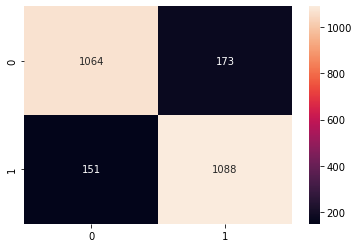

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

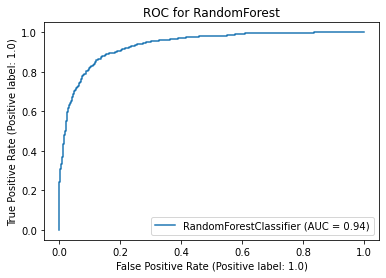

In [78]:
plot_roc_curve(RainTomorrow, x_test, y_test)
plt.title("ROC for RandomForest")
plt.show()

# B. Rainfall

In [79]:
new_df2

,Day,Month,Year,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,WindSpeed9am
0,1.0,12.0,2008.0,13.4,22.900000,0.843433,3.194193,7.017613,44.000000,20.0,...,5.123513,16.9,21.8,1,13,13,14,0.0,0.0,2.714418
1,2.0,12.0,2008.0,7.4,25.100000,0.000000,3.782574,12.799771,44.000000,4.0,...,1.619932,17.2,24.3,1,14,6,15,0.0,0.0,1.587401
2,3.0,12.0,2008.0,12.9,25.700000,0.000000,5.728303,12.205468,46.000000,19.0,...,2.000000,21.0,23.2,1,15,13,15,0.0,0.0,2.668402
3,4.0,12.0,2008.0,9.2,28.000000,0.000000,3.558423,13.319713,24.000000,11.0,...,1.025754,18.1,26.5,1,4,9,0,0.0,0.0,2.223980
4,5.0,12.0,2008.0,17.5,32.300000,1.000000,3.765248,6.979772,41.000000,7.0,...,8.000000,17.8,29.7,1,13,1,7,0.0,0.0,1.912931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21.0,6.0,2017.0,2.8,23.400000,0.000000,6.957544,11.418350,31.000000,13.0,...,1.727655,10.1,22.4,9,0,9,1,0.0,0.0,2.351335
8421,22.0,6.0,2017.0,3.6,25.300000,0.000000,6.663456,12.104654,22.000000,13.0,...,1.292887,10.9,24.5,9,6,9,3,0.0,0.0,2.351335
8422,23.0,6.0,2017.0,5.4,26.900000,0.000000,8.423890,11.881216,37.000000,9.0,...,1.735513,12.5,26.1,9,3,9,14,0.0,0.0,2.080084
8423,24.0,6.0,2017.0,7.8,27.000000,0.000000,8.745717,10.868035,28.000000,13.0,...,2.000000,15.1,26.0,9,9,10,3,0.0,0.0,2.351335


In [80]:
# Distributing column X and Y
X=new_df2.drop('Rainfall',axis=1)
Y=new_df2['Rainfall']
X # (checking X)

,Day,Month,Year,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,WindSpeed9am
0,1.0,12.0,2008.0,13.4,22.900000,3.194193,7.017613,44.000000,20.0,24.0,...,5.123513,16.9,21.8,1,13,13,14,0.0,0.0,2.714418
1,2.0,12.0,2008.0,7.4,25.100000,3.782574,12.799771,44.000000,4.0,22.0,...,1.619932,17.2,24.3,1,14,6,15,0.0,0.0,1.587401
2,3.0,12.0,2008.0,12.9,25.700000,5.728303,12.205468,46.000000,19.0,26.0,...,2.000000,21.0,23.2,1,15,13,15,0.0,0.0,2.668402
3,4.0,12.0,2008.0,9.2,28.000000,3.558423,13.319713,24.000000,11.0,9.0,...,1.025754,18.1,26.5,1,4,9,0,0.0,0.0,2.223980
4,5.0,12.0,2008.0,17.5,32.300000,3.765248,6.979772,41.000000,7.0,20.0,...,8.000000,17.8,29.7,1,13,1,7,0.0,0.0,1.912931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21.0,6.0,2017.0,2.8,23.400000,6.957544,11.418350,31.000000,13.0,11.0,...,1.727655,10.1,22.4,9,0,9,1,0.0,0.0,2.351335
8421,22.0,6.0,2017.0,3.6,25.300000,6.663456,12.104654,22.000000,13.0,9.0,...,1.292887,10.9,24.5,9,6,9,3,0.0,0.0,2.351335
8422,23.0,6.0,2017.0,5.4,26.900000,8.423890,11.881216,37.000000,9.0,9.0,...,1.735513,12.5,26.1,9,3,9,14,0.0,0.0,2.080084
8423,24.0,6.0,2017.0,7.8,27.000000,8.745717,10.868035,28.000000,13.0,7.0,...,2.000000,15.1,26.0,9,9,10,3,0.0,0.0,2.351335


## StandardScaler for scaling Features

In [81]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Day,Month,Year,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,WindSpeed9am
0,-1.672365,1.632977,-1.662497,0.057333,-0.145108,-0.562755,-0.111687,0.415595,0.713118,0.639725,...,0.314503,-0.137321,-0.095695,-1.508676,1.228375,1.251279,1.400759,-0.542317,-0.54328,0.707968
1,-1.558700,1.632977,-1.662497,-1.054000,0.219999,-0.375310,1.465778,0.415595,-0.984979,0.423611,...,-1.084085,-0.083646,0.330524,-1.508676,1.440962,-0.276716,1.626999,-0.542317,-0.54328,-0.644752
2,-1.445035,1.632977,-1.662497,-0.035278,0.319574,0.244555,1.303642,0.561577,0.606987,0.855840,...,-0.932367,0.596233,0.142987,-1.508676,1.653549,1.251279,1.626999,-0.542317,-0.54328,0.652737
3,-1.331370,1.632977,-1.662497,-0.720600,0.701276,-0.446720,1.607626,-1.044231,-0.242062,-0.981132,...,-1.321274,0.077378,0.705597,-1.508676,-0.684909,0.378139,-1.766604,-0.542317,-0.54328,0.119313
4,-1.217705,1.632977,-1.662497,0.816744,1.414894,-0.380830,-0.122011,0.196621,-0.666586,0.207497,...,1.462762,0.023703,1.251157,-1.508676,1.228375,-1.368141,-0.182922,-0.542317,-0.54328,-0.254029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8012,0.600934,-0.124675,2.001008,-1.906022,-0.062129,0.636163,1.088904,-0.533292,-0.029799,-0.765017,...,-1.041084,-1.353946,0.006597,1.027839,-1.535257,0.378139,-1.540363,-0.542317,-0.54328,0.272172
8013,0.714599,-0.124675,2.001008,-1.757844,0.253191,0.542474,1.276139,-1.190213,-0.029799,-0.981132,...,-1.214638,-1.210814,0.364621,1.027839,-0.259734,0.378139,-1.087883,-0.542317,-0.54328,0.272172
8014,0.828264,-0.124675,2.001008,-1.424445,0.518723,1.103308,1.215181,-0.095344,-0.454324,-0.981132,...,-1.037947,-0.924549,0.637402,1.027839,-0.897496,0.378139,1.400759,-0.542317,-0.54328,-0.053401
8015,0.941929,-0.124675,2.001008,-0.979911,0.535319,1.205835,0.938769,-0.752266,-0.029799,-1.197246,...,-0.932367,-0.459369,0.620353,1.027839,0.378027,0.596424,-1.087883,-0.542317,-0.54328,0.272172


## Variance Inflation Factor (VIF)

In [83]:
# Importing Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,Day,1.006816
1,Month,1.235323
2,Year,2.028409
3,MinTemp,10.042441
4,MaxTemp,37.048103
5,Evaporation,3.512198
6,Sunshine,7.429933
7,WindGustSpeed,3.699930
8,WindSpeed9am,5.528348
9,WindSpeed3pm,2.580629


In [85]:
X.drop("Temp3pm",axis=1,inplace=True)

In [86]:
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,Day,1.005629
1,Month,1.212853
2,Year,2.028127
3,MinTemp,9.957403
4,MaxTemp,12.952554
5,Evaporation,3.511924
6,Sunshine,7.428145
7,WindGustSpeed,3.643497
8,WindSpeed9am,5.509722
9,WindSpeed3pm,2.580421


In [87]:
X.drop("Pressure9am",axis=1,inplace=True)

In [88]:
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,Day,1.004020
1,Month,1.202382
2,Year,2.016779
3,MinTemp,9.823176
4,MaxTemp,11.673292
5,Evaporation,3.463947
6,Sunshine,7.244973
7,WindGustSpeed,3.639084
8,WindSpeed9am,5.467932
9,WindSpeed3pm,2.568144


In [89]:
X.drop("Temp9am",axis=1,inplace=True)

In [90]:
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,Day,1.003862
1,Month,1.185467
2,Year,1.983425
3,MinTemp,5.462725
4,MaxTemp,7.465841
5,Evaporation,3.456650
6,Sunshine,7.243885
7,WindGustSpeed,3.575944
8,WindSpeed9am,5.409175
9,WindSpeed3pm,2.487564


### Finding Best Model

## 2. REGRESSION:

- **RandomForestRegressor**

- **Decision Tree Regressor**

- **AdaBoostRegressor**

- **Gradient Boosting Regressor**

- **Bagging Regressor**

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [92]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc = r2_score(Y_test, pred)
    if acc > maxAccu:
        maxAccu=acc
        maxRS = i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8722121387387252  on Random_state  45


### RandomForestRegressor

In [93]:
RF = RandomForestRegressor()
RF.fit(X_train,Y_train)
print('==============================================================================================')
predrf = RF.predict(X_test)
print('R2_Score:',r2_score(Y_test,predrf))
print('==============================================================================================')
print('MAE:',metrics.mean_absolute_error(Y_test, predrf))
print('MSE:',metrics.mean_squared_error(Y_test, predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predrf)))

R2_Score: 0.8451129992021034
MAE: 0.21498409359244247
MSE: 0.10714626020754722
RMSE: 0.3273320335798915


### DecisionTreeRegressor

In [94]:
# Checking R2 score for Decision Tree Regressor
DT = DecisionTreeRegressor()
DT.fit(X_train,Y_train)
print('==============================================================================================')
# prediction
preddt = DT.predict(X_test)
print('R2_Score:',r2_score(Y_test,preddt))
print('==============================================================================================')
# Metric evaluation
print('MAE:',metrics.mean_absolute_error(Y_test, preddt))
print('MSE:',metrics.mean_squared_error(Y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, preddt)))

R2_Score: 0.7111667585082446
MAE: 0.21839400838426223
MSE: 0.1998063200271176
RMSE: 0.4469970022574174


### GradientBoosting Regressor

In [95]:
# Checking R2 score for Decision Tree Regressor
GBR = GradientBoostingRegressor()
GBR.fit(X_train,Y_train)
print('==============================================================================================')
# prediction
preddt = GBR.predict(X_test)
print('R2_Score:',r2_score(Y_test,preddt))
print('==============================================================================================')
# Metric evaluation
print('MAE:',metrics.mean_absolute_error(Y_test, preddt))
print('MSE:',metrics.mean_squared_error(Y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, preddt)))

R2_Score: 0.7983576944432919
MAE: 0.2604963446027251
MSE: 0.13949020142897753
RMSE: 0.3734838703732432


### AdaBoostRegressor

In [96]:
# Checking R2 score for Decision Tree Regressor
ABR = AdaBoostRegressor()
ABR.fit(X_train,Y_train)
print('==============================================================================================')
# prediction
preddt = ABR.predict(X_test)
print('R2_Score:',r2_score(Y_test,preddt))
print('==============================================================================================')
# Metric evaluation
print('MAE:',metrics.mean_absolute_error(Y_test, preddt))
print('MSE:',metrics.mean_squared_error(Y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, preddt)))

R2_Score: 0.6304270278754441
MAE: 0.41799725515970126
MSE: 0.25565968501516767
RMSE: 0.5056280105128351


### BaggingRegressor

In [97]:
# Checking R2 score for Decision Tree Regressor
BR = BaggingRegressor()
BR.fit(X_train,Y_train)
print('==============================================================================================')
# prediction
preddt = BR.predict(X_test)
print('R2_Score:',r2_score(Y_test,preddt))
print('==============================================================================================')
# Metric evaluation
print('MAE:',metrics.mean_absolute_error(Y_test, preddt))
print('MSE:',metrics.mean_squared_error(Y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, preddt)))

R2_Score: 0.832221203144432
MAE: 0.21851050300521083
MSE: 0.11606442459721265
RMSE: 0.34068229275560047


## Cross-Validation

In [98]:
# Checking cv score for Random Forest Regressor
print('Random Forest:',cross_val_score(RF,X,Y,cv=5).mean())
print('==================================================')

# Checking cv score for Decision Tree Regressor
print('Decision Tree:',cross_val_score(DT,X,Y,cv=5).mean())
print('==================================================')

# Checking cv score for Gradient Boosting Regressor
print('Gradient Boosting:',cross_val_score(GBR,X,Y,cv=5).mean())
print('==================================================')

# Checking cv score for AdaBoostRegressor
print('Bagging Regressor:',cross_val_score(ABR,X,Y,cv=5).mean())
print('==================================================')

# Checking cv score for BaggingRegressor
print('ExtraTreesRegressor:',cross_val_score(BR,X,Y,cv=5).mean())
print('==================================================')

Random Forest: 0.8051576880793767
Decision Tree: 0.5281719438709306
Gradient Boosting: 0.7715688670773109
Bagging Regressor: 0.6182863616823091
ExtraTreesRegressor: 0.7793150140587457


# Hyper parameter tuning

In [99]:
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import r2_score

In [100]:
RF = RandomForestRegressor()

param ={
       'n_estimators':[100,200],
      'criterion':['mse','mae'],
     'min_samples_split':[2],
    'min_samples_leaf':[1],
}

In [101]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [102]:
RF_grid.fit(X_train,Y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(X_test)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [103]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [104]:
print('MSE:',mean_squared_error(RF_grid_PRED,Y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,Y_test))
print ('==============================================')
print('r2_score:',r2_score(RF_grid_PRED,Y_test))
print ('==============================================')

MSE: 0.10703404030874361
MAE: 0.2152544873644146
r2_score: 0.8229534112711376


# Saving Model

In [105]:
import joblib
joblib.dump(RF_grid,"rainfall.pkl")

['rainfall.pkl']

# Conclusion

There were 2 prediction to be made in our data, one was for if it will rain tomorrow and other one was for rainfall, these were classification and regressor problem respectively. We have creading algorithms which predicts whether it will rain tomorrow with test accuracy of almost 87% and it predicts rainfall with 82% accuracy.